In [ ]:
'''
1. データの読み込みと前処理(One-Hotのみ)を行う関数
'''
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

def prepare_data():
    '''データを用意する
    
    Returns:
      x_train(ndarray): 訓練データ(50000,32,32,3)
      x_test(ndarray) : テストデータ(10000,32,32,3)
      y_train(ndarray): 訓練データのOne-Hot化した正解ラベル(50000,)
      y_test(ndarray) : テストデータのOne-Hot化した正解ラベル(10000,)
    '''
    # CFAR-10の読み込み
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()       
    # 訓練データとテストデータの正解ラベルを10クラスのOne-Hot表現に変換
    y_train, y_test = to_categorical(y_train), to_categorical(y_test)
    
    return x_train, x_test, y_train, y_test

In [ ]:
'''
2. モデルの生成を行う関数
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D    # convolution layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers, optimizers

def make_convlayer():
    '''モデルを生成する
    
    Returns:
      model(Model): 生成済みのモデル
    '''
    # 正則化のハイパーパラメーターを設定
    weight_decay = 1e-4

    # Sequentialオブジェクトを生成
    model = Sequential()

    # 第1層: 畳み込み層1: 正則化を行う
    # (バッチサイズ,32,3,3) -> (バッチサイズ,32,32,32)
    model.add(
        Conv2D(
            filters=32,                    # フィルターの数
            kernel_size=(3,3),             # 3x3のフィルターを使用
            input_shape=x_train[0].shape,  # 入力データの形状
            padding='same',                # ゼロパディングを行う 
            kernel_regularizer=regularizers.l2(weight_decay),
            activation='relu'              # 活性化関数はReLU
            ))
    # 正規化
    model.add(BatchNormalization())

    # 第2層: 畳み込み層2: 正則化を行う
    # (バッチサイズ,32,32,32) ->(バッチサイズ,32,32,32)
    model.add(
        Conv2D(filters=32,                 # フィルターの数は32
            kernel_size=(3,3),          # 3×3のフィルターを使用
            padding='same',             # ゼロパディングを行う 
            kernel_regularizer=regularizers.l2(weight_decay),
            activation='relu'           # 活性化関数はReLU
            ))
    # 正規化
    model.add(BatchNormalization())

    # 第3層: プーリング層1: ウィンドウサイズは2×2
    # (バッチサイズ,32,32,32) -> (バッチサイズ,16,16,32)
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ドロップアウト1：ドロップアウトは20％
    model.add(Dropout(0.2))
    
    # 第4層: 畳み込み層3　正則化を行う
    # (バッチサイズ,16,16,32) ->(バッチサイズ,16,16,64)
    model.add(
        Conv2D(filters=64,              # フィルターの数は64
            kernel_size=(3,3),          # 3×3のフィルターを使用
            padding='same',             # ゼロパディングを行う 
            kernel_regularizer=regularizers.l2(weight_decay),
            activation='relu'           # 活性化関数はReLU
            ))
    # 正規化
    model.add(BatchNormalization())

    # 第5層: 畳み込み層4: 正則化を行う
    # (バッチサイズ,64,16,16) ->(バッチサイズ,64,16,16)
    model.add(
        Conv2D(filters=64,              # フィルターの数は64
            kernel_size=(3,3),          # 3×3のフィルターを使用
            padding='same',             # ゼロパディングを行う 
            kernel_regularizer=regularizers.l2(weight_decay),
            activation='relu'           # 活性化関数はReLU
            ))
    # 正規化
    model.add(BatchNormalization())

    # 第6層: プーリング層2: ウィンドウサイズは2×2
    # (バッチサイズ,16,16,64) -> (バッチサイズ,8,8,64)
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ドロップアウト2：ドロップアウトは30％
    model.add(Dropout(0.3))
    
    # 第7層: 畳み込み層5: 正則化を行う
    # (バッチサイズ,8,8,64) -> (バッチサイズ,8,8,128)
    model.add(
        Conv2D(filters=128,             # フィルターの数は128
            kernel_size=(3,3),          # 3×3のフィルターを使用
            padding='same',             # ゼロパディングを行う 
            kernel_regularizer=regularizers.l2(weight_decay),
            activation='relu'           # 活性化関数はReLU
            ))
    # 正規化
    model.add(BatchNormalization())

    # 第8層: 畳み込み層6: 正則化を行う
    # (バッチサイズ,8,8,128) -> (バッチサイズ,8,8,128)
    model.add(
        Conv2D(filters=128,             # フィルターの数は128
            kernel_size=(3,3),          # 3×3のフィルターを使用
            padding='same',             # ゼロパディングを行う 
            kernel_regularizer=regularizers.l2(weight_decay),
            activation='relu'           # 活性化関数はReLU
            ))
    # 正規化
    model.add(BatchNormalization())

    # 第9層: プーリング層3: ウィンドウサイズは2×2
    # (バッチサイズ,8,8,128) -> (バッチサイズ,4,4,128)
    model.add(MaxPooling2D(pool_size=(2,2)))
    # ドロップアウト3：ドロップアウトは40％
    model.add(Dropout(0.4))
    
    # Flatten: 4階テンソルから2階テンソルに変換
    # (バッチサイズ,4,4,128) -> (バッチサイズ,2048)
    model.add(Flatten())

    # 第10層: 全結合層
    # (バッチサイズ,2048) -> (バッチサイズ,128)
    model.add(Dense(128,                # ニューロン数は128
                    activation='relu')) # 活性化関数はReLU
    # ドロップアウト4：ドロップアウトは40％
    model.add(Dropout(0.4))

    # 第11層: 出力層
    # (バッチサイズ,128) -> (バッチサイズ,10)
    model.add(Dense(10,                    # 出力層のニューロン数は10
                    activation='softmax')) # 活性化関数はソフトマックス

    # Sequentialオブジェクトのコンパイル
    model.compile(
        loss='categorical_crossentropy', # クロスエントロピー誤差
        optimizer=optimizers.Adam(lr=0.001),    # Adamを使用
        metrics=['accuracy'] # 学習評価として正解率を指定
    )

    return model

In [ ]:
'''
3. 学習を行う関数
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

def train(x_train, x_test, y_train, y_test):
    '''学習を行う

    Parameters:
      x_train, y_train : 訓練データ
      x_test,  y_test  : テストデータ      
    Returns:
      model(Model): 学習済みのModelオブジェクト
      history(History) : 学習の推移を格納したHistoryオブジェクト
    '''
    # モデルを生成してサマリを出力
    model = make_convlayer()
    model.summary()

    # ミニバッチのサイズ
    batch_size = 64

    # val_accuracyの改善が5エポック見られなかったら、学習率を0.5倍する。
    reduce_lr = ReduceLROnPlateau(
        monitor='val_accuracy', # 監視対象は検証データの精度
        factor=0.5,             # 学習率を減衰させる割合
        patience=5,             # 監視対象のエポック数
        verbose=1,              # 学習率を下げたときに通知する
        mode='max',             # 最高値を監視する
        min_lr=0.0001           # 学習率の下限
        )
    
    # データジェネレーターを生成
    # 訓練データ
    train_datagen = ImageDataGenerator(
        featurewise_center=True,# データセット全体の平均値を取得
        featurewise_std_normalization=True, # データを標準化する
        width_shift_range=0.1,  # 横サイズの0.1の割合でランダムに水平移動
        height_shift_range=0.1, # 縦サイズの0.1の割合でランダムに垂直移動
        rotation_range=10,      # 10度の範囲でランダムに回転させる
        zoom_range=0.1,         # ランダムに拡大
        horizontal_flip=True)   # 左右反転
    # テストデータ
    test_datagen = ImageDataGenerator(
        featurewise_center=True,# データセット全体の平均値を取得
        featurewise_std_normalization=True, # データを標準化する
    )

    # ジェネレーターで正規化を行う場合はfit()でデータに適合させる
    # 訓練データ
    train_datagen.fit(x_train)
    # テストデータ
    test_datagen.fit(x_test)

    # ジェネレーターにミニバッチを適合させる
    # 訓練データ
    train_generator = train_datagen.flow(
        x_train, # 訓練データ
        y_train, # 正解ラベル
        batch_size=batch_size
        )
    # 検証データ
    validation_generator = test_datagen.flow(
        x_test, # テストデータ
        y_test, # 正解ラベル
        batch_size=batch_size
        )

    # 学習回数
    epochs = 120
    # 学習を行う
    history = model.fit(
        train_generator, # 訓練データ
        epochs=epochs,   # 学習回数
        verbose=1,       # 進捗状況を出力する
        validation_data=validation_generator, # 検証データ
        callbacks=[reduce_lr] # 学習率減衰をコールバック
    )
    # モデルのオブジェクトとhistoryを戻り値として返す
    return model, history

In [ ]:
%%time
'''
4. データを用意して学習を行う
'''
x_train, x_test, y_train, y_test = prepare_data()
model, history = train(x_train, x_test, y_train, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

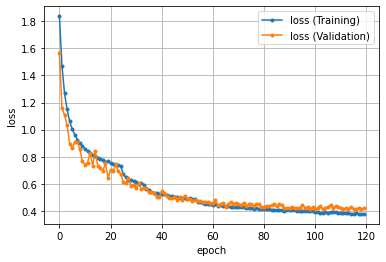

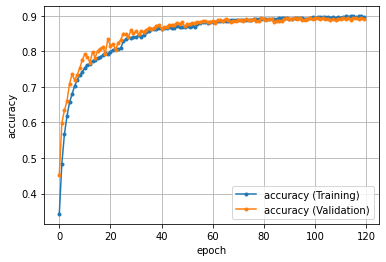

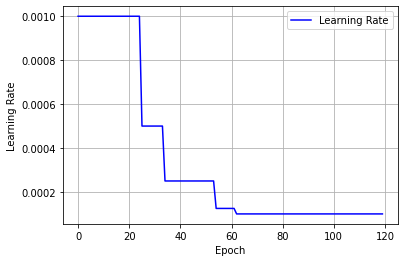

In [ ]:
'''
5. 損失、精度、学習率の推移をグラフにする
'''
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    # 学習結果（損失）のグラフを描画
    plt.plot(history.history['loss'],
            marker='.',
            label='loss (Training)')
    plt.plot(history.history['val_loss'],
            marker='.',
            label='loss (Validation)')
    plt.legend(loc='best')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

    # 学習結果（精度）のグラフを描画
    plt.plot(history.history['accuracy'],
            marker='.',
            label='accuracy (Training)')
    plt.plot(history.history['val_accuracy'],
            marker='.',
            label='accuracy (Validation)')
    plt.legend(loc='best')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()

    # 学習率をプロット
    plt.plot(history.history['lr'],
            label='Learning Rate',
            color='blue')
    plt.legend()         # 凡例を表示
    plt.grid()           # グリッド表示
    plt.xlabel('Epoch')  # x軸ラベル
    plt.ylabel('Learning Rate')    # y軸ラベル
    plt.show()

# プロットする
plot_history(history)

In [ ]:
'''
6. モデルとパラメーターの値を保存
'''
# モデルをmodel.jsonとして保存
with open('model.json', 'w') as json_file:
    json_file.write(model.to_json()) # モデルをJSON形式に変換して保存
# パラメーターをweight.h5として保存
model.save_weights('weight.h5')      # HDF5形式で保存

In [ ]:
'''
7. 学習済みモデルを読み込んでテストデータで検証する
'''
import numpy as np
from tensorflow.keras.models import model_from_json

# モデルの読み込み
model_r = model_from_json(open('model.json', 'r').read())
# 重みの読み込み
model_r.load_weights('weight.h5')
# Sequentialオブジェクトのコンパイル
model_r.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])

# C-FAR10を用意
x_train, x_test, y_train, y_test = prepare_data()
# テストデータ
test_datagen = ImageDataGenerator(
    featurewise_center=True,# データセット全体の平均値を取得
    featurewise_std_normalization=True, # データを標準化する
)
# fit()でテストデータに適合させる
test_datagen.fit(x_test)
# ジェネレーターにミニバッチを適合させる
validation_generator = test_datagen.flow(
    x_test, y_test, batch_size=64)
# テストデータでテストする
scores = model_r.evaluate(validation_generator, verbose=0)
print('Test loss: %.4f accuracy: %.4f' % ( scores[0], scores[1]))

Test loss: 0.4211 accuracy: 0.8895


In [ ]:
'''
8. 画像を出力する関数
'''
%matplotlib inline
import matplotlib.pyplot as plt

# 描画を行う関数
def draw(X):
    plt.figure(figsize=(10, 10))# 描画エリアは10×10インチ
    pos = 1                     # 画像の描画位置を保持

    for i in range(X.shape[0]): # 画像の枚数だけ描画処理を繰り返す
        plt.subplot(4, 5, pos)  # 4×5の描画領域のpos番目の位置
        plt.imshow(X[i])        # インデックスiの画像を描画
        plt.axis('off')         # 軸目盛は非表示
        pos += 1
    plt.show()

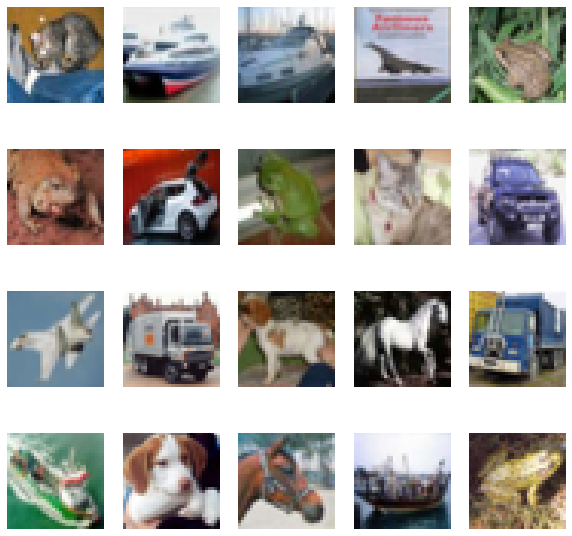

['cat', 'ship', 'automobile', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog']


In [ ]:
'''
9. 画像を表示してその画像が何であるかを言い当てさせる
'''
# 先頭から20枚を描画
draw(x_test[:20])
 
# 学習済みモデルを読み込む
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('weight.h5')

# 正解ラベルのテキスト
labels =  [
    'airplane','automobile','bird','cat',
    'deer','dog','frog','horse','ship','truck']

# 学習済みモデルで予測する
# 標準化されたテストデータを使用
# テストデータを標準化する
mean = np.mean(x_test)
std = np.std(x_test)
# 標準偏差に極小値を加えてから標準化する
x_test_s = (x_test - mean)/(std + 1e-7)
indices = np.argmax(model.predict(x_test_s[:20]),1)
print ([labels[x] for x in indices])